<a href="https://colab.research.google.com/github/TheClassicTechno/eegmlJH/blob/main/Copy_of_compress_experiments%20eeg75.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install eeghdf

!git clone https://github.com/eegml/eeghdf.git 
!cd eeghdf



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'eeghdf'...
remote: Enumerating objects: 640, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 640 (delta 42), reused 77 (delta 29), pack-reused 536
Receiving objects: 100% (640/640), 7.91 MiB | 13.83 MiB/s, done.
Resolving deltas: 100% (328/328), done.


In [2]:
%pip install ipywidgets 
%pip install widgetsnbextension



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:

!pip install git+https://github.com/eegml/eegvis.git

!git clone https://github.com/eegml/eegvis.git
!cd eegvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/eegml/eegvis.git to /tmp/pip-req-build-wkjpfsht
  Running command git clone -q https://github.com/eegml/eegvis.git /tmp/pip-req-build-wkjpfsht
  Created wheel for eegvis: filename=eegvis-0.2.1-py3-none-any.whl size=52030 sha256=19da82842baa786ed3f77bb62cb9ade3ff7c9d76f3c57722703f350eb8bd75f8
  Stored in directory: /tmp/pip-ephem-wheel-cache-cukvuhlu/wheels/02/c0/63/9178cadca53027f67c4e0759a28deea88f9fcd5f1cd24b2d7f
Successfully built eegvis
Cloning into 'eegvis'...
remote: Enumerating objects: 669, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 669 (delta 52), reused 52 (delta 28), pack-reused 584
Receiving objects: 100% (669/669), 5.77 MiB | 10.96 MiB/s, done.
Resolving deltas: 100% (437/437), done.


In [4]:
# from bz2 import compress
# from curses import window
# from random import sample
# from subprocess import CompletedProcess
import eeghdf
import gzip
import numpy as np

In [5]:
import matplotlib
import matplotlib.pyplot as plt


In [6]:
import eegvis.stacklineplot as stacklineplot

In [381]:
# configuration
matplotlib.rcParams["figure.figsize"] = (12.0, 8.0)
# for new installs you will need to change DATADIR to point to appropriate folder
DATADIR = "/content"

EEGFILE = DATADIR + "/eeg75.eeg.h5"
#eeg = eeghdf.Eeghdf(EEGFILE)

eeg = eeghdf.Eeghdf(EEGFILE)

In [382]:
ls /content

absence_epilepsy.eeg.h5  eeg76.eeg.h5  eeghdf/  sample_data/
eeg75.eeg.h5             eeg78.eeg.h5  eegvis/  spasms.eeg.h5*


In [383]:
sample_rate = eeg.sample_frequency
N = int(sample_rate * 10)  # get 10 seconds of data
sec_offset = 0
offset = int(sample_rate * sec_offset)
print(N, offset)

2560 0


In [384]:

first10 = eeg.rawsignals[0, offset : offset + N]  # returns a numpy array
full_len=eeg.rawsignals[0,: ]

In [385]:
def biHex(fullHex):
  easyHex=' '.join(fullHex[i:i+2] for i in range(0, len(fullHex), 2))
  print(easyHex)

In [386]:
# want to get the buffer reference to this array (???)

data = first10.data  # or first10.get_buffer(...) if need a slice
databytes = bytes(data)
res = gzip.compress(databytes)
res.hex()
biHex(res.hex())

1f 8b 08 00 58 29 11 63 02 ff 8d 98 8b 5f 8f 77 1b c7 af bb 73 ab a4 34 c9 21 54 4e 09 ad b0 2c c4 d0 34 69 2c e2 31 2c 6c cc ec 14 da f0 60 1e 36 cf 18 cd 36 b3 61 73 98 39 65 9b 9c c6 e6 58 cc 69 36 31 d2 14 b1 ce 27 bf 54 6a 89 ae e7 7d df 7f c1 f3 ba 5f fd 7e df df f7 70 1d 3f d7 e7 7b dd 89 d8 8b b7 74 96 60 09 e0 e9 2c 41 12 c8 df ff fb 04 4a 4b 51 6d 25 6f c8 4a 49 94 97 64 b9 7c 25 9f c9 6a 99 67 fd 1a 23 d1 32 5a fe 2d 1b 64 a3 6c 91 af d9 35 54 c6 cb 6c d6 86 31 9a c2 4a a2 3c 25 21 d2 5d 5a 48 73 a4 45 b3 36 97 95 ae 8c 5b 33 3b 44 ba 89 9d 38 b1 e3 79 7e fd a3 ed 38 93 20 bd 98 1d c0 f7 cb cc b6 62 bd 3d bf 1d a5 51 3d c5 4d 5c f0 a6 49 7b c9 eb f2 8e 4c 97 a9 12 2b 11 12 ca 0e 5f 4e 8d 95 78 f1 67 67 30 a3 31 7c 3e 81 d6 40 66 3c 98 f3 c7 ce 68 71 97 87 7a 4f ff d1 10 e6 b6 eb 61 ed 20 03 a5 93 54 eb 0f ba 5f 9d a5 a7 3c d6 42 b4 d4 6a aa 66 69 38 36 66 31 7f 54 73 d5 5d da 48 a5 fe a1 35 ea 83 0d 35 7a 56 b7 e9 8f 7a 8d b8 8c c5 86 18 e4 5f d4 4b 9a c7 8e 33 fa 50 db 4b b

In [387]:

c = len(res)
ratio = len(databytes) / c
ratio

1.4562002275312855

In [388]:
# now try shifting bits to quant


def quant_to_bytes(n, arr):
    arr = np.right_shift(arr, n)
    data = arr.data
    return bytes(data)


def compress_ndarray(arr) -> bytes:
    databytes = bytes(arr.data)  # arr.data is memory_view of arr
    return gzip.compress(databytes)

# todo, write an uncompress, to validate that this is loss-less compression


def compress_ratio(arr, # expect initially 1D array
                   quant=8):
    """takes arrlike @arr
    quantitizes this to @quant bits"""
    nbytes = arr.dtype.itemsize  # np.uint16(0).nbytes
    nbits = 8 * nbytes
    rshift = nbits - quant
    shifted_arr = np.right_shift(arr, rshift)
    shifted_arr_bytes = bytes(shifted_arr.data)
    comp_arrbytes = gzip.compress(shifted_arr_bytes)

    return len(shifted_arr_bytes) / len(comp_arrbytes)

In [389]:
# test out np.right_shift on 2d arrays
simple2d = np.array([[2000,1028, -200, 10, 65], [30000, -15000,7000,3500,1700] ], dtype=np.int16)

```
0 -> 0000 # base 2
1 -> 0001
2 -> 0010
3 -> 0011
```
this leaves out how to represent negative numbers using two's complement


In [390]:
simple2d

array([[  2000,   1028,   -200,     10,     65],
       [ 30000, -15000,   7000,   3500,   1700]], dtype=int16)

In [391]:
# I don't think I needed to really change anything between compress_ratio_1d

def compress_ratio_2d(arr2d, # expect 2D array, broadcasting?
                   quant=8):
    """takes arrlike @arr
    quantitizes this to @quant bits"""
    nbytes = arr2d.dtype.itemsize  # np.uint16(0).nbytes
    nbits = 8 * nbytes
    rshift = nbits - quant
    shifted_arr = np.right_shift(arr2d, rshift)
    shifted_arr_bytes = bytes(shifted_arr.data)
    comp_arrbytes = gzip.compress(shifted_arr_bytes)

    return len(shifted_arr_bytes) / len(comp_arrbytes)




In [392]:
q8 = compress_ratio(first10, quant=8)
q8

15.802469135802468

In [393]:
q12 = compress_ratio(first10, quant=12)
q12

3.1219512195121952

In [394]:
q16 = compress_ratio(first10, quant=16)
q16

1.4562002275312855

In [395]:
quants = [1, 2, 4, 6, 8, 10, 12, 14, 16]
ratiosbyQ = [compress_ratio(first10, quant=qq) for qq in quants]

Text(0.5, 1.0, 'compression ratio vs quantization number')

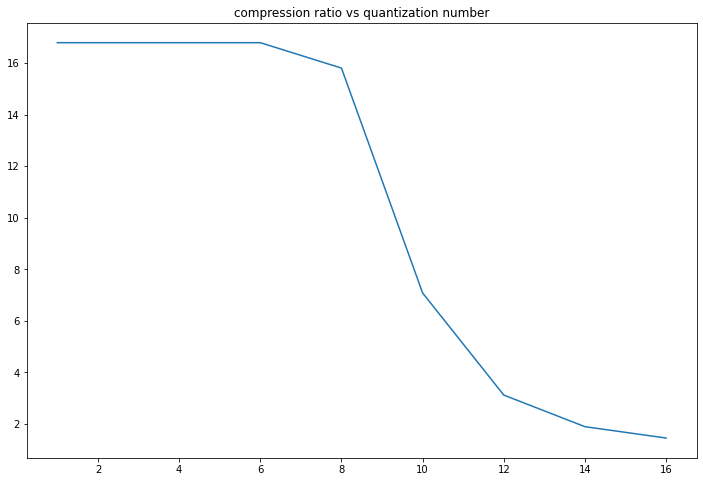

In [396]:

plt.plot(quants, ratiosbyQ)
plt.title("compression ratio vs quantization number")

In [397]:
ratiosbyQ

[16.78688524590164,
 16.78688524590164,
 16.78688524590164,
 16.78688524590164,
 15.802469135802468,
 7.081604426002766,
 3.1219512195121952,
 1.8962962962962964,
 1.4562002275312855]

In [398]:
len(f10_0) #2000 total

2000

In [399]:
# subdivide this "epoch" of data
f10_0 = full_len[0 : int(sample_rate * 10)]
f10_1 = full_len[int(sample_rate * 10) : int(sample_rate * 20)]

In [400]:
seg_compare = [compress_ratio(f10_0, quant=4), compress_ratio(f10_1, quant=4)]
seg_compare
#q=16 means even the tiniest signals have to be reproduced, even noise, 

[16.78688524590164, 21.88034188034188]

In [401]:
# now plot these
fig = plt.Figure()
fig.set_tight_layout(True)
axs = fig.subplots(3,1)

axs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f196c96d990>,
      dtype=object)

In [402]:
f10_1.shape

(2560,)

In [403]:
axs[0].plot(f10_0)
axs[0].set_title('rawsignal int16 10s (1st 10s)')

Text(0.5, 1.0, 'rawsignal int16 10s (1st 10s)')

In [404]:
axs[1].plot(f10_1)
axs[1].set_title('2nd 10 seconds (10-20')

Text(0.5, 1.0, '2nd 10 seconds (10-20')

In [405]:
axs[2].bar([0.0, 1], seg_compare, 1, align="edge")

<BarContainer object of 2 artists>

In [406]:
axs[2].set_xlabel("segment")

Text(0.5, 0, 'segment')

In [407]:
axs[2].set_ylabel("compression ratio")
axs[2].set_title("compression ratio of first 10 vs second 10 sec (q=8)")

Text(0.5, 1.0, 'compression ratio of first 10 vs second 10 sec (q=8)')

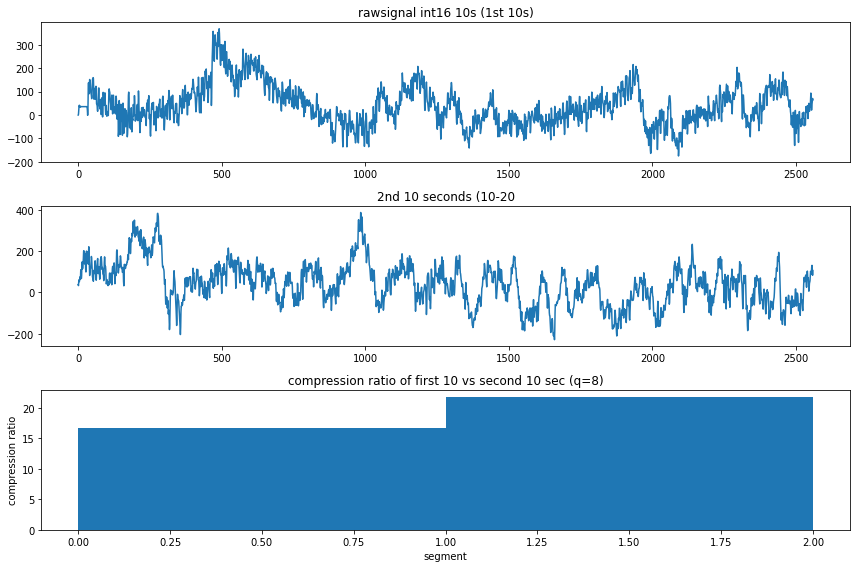

In [408]:
fig # will show figure in notebook, otherwise will do nothing

Ok, that seems to make sense. compression ration (CR) via gzip compression can tell the difference between signals in some way.
This was a really obvious difference as first 5 seconds is much more predictable than the second half of the signal.
What about some initial comparions for different types of seizures?

- will need to make a scanning function with moving window
- find seizure times
- start with the 3 example files

In [409]:
# where are the seizures?

an_df = eeg.edf_annotations_df
an_df
an_df[an_df.text.str.contains("SZ|absence|spasm",case= False,)]

,text,starts_sec,starts_100ns


In [410]:
# see that rows 86 and 88 mark a seizure, and rows 91 and 93 do the same
an_df.iloc[86]

IndexError: ignored

In [ ]:
sz_start_sec = an_df.iloc[86].starts_sec
sz_stop_sec = an_df.iloc[88].starts_sec

In [ ]:
surround_sec = 10.0  # sec
epoch = [sz_start_sec - surround_sec, sz_stop_sec + surround_sec]

In [ ]:
epocharr = eeg.rawsignals[
    0:19, int(epoch[0] * sample_rate) : int(epoch[1] * sample_rate)
]
stacklineplot.stackplot(
    epocharr, epoch[1] - epoch[0], start_time=0, yscale=2.0, topdown=True
)

In [ ]:
class ArrScanner:
    """take data in numpy array form or arr-like
    break it up into small windows of size window_size samples
    apply model_callable"""
    def __init__(
        self,
        model_callable,
        data,  # 2D shape (n_chan, n_samples) np array-like: [np.ndarray | Any], #
        window_size: int, # num samples in window
        batch_size: int, 
        model_dir: str = "",
    ):
        """@arrlike
        W - size of window in samples
        @start sample
        @stop sample
        """
        self.model_callable = model_callable
        self.window_size = window_size
        self.batch_size = batch_size
        self.model_dir = model_dir
        # not using data
        
    def evaluate_model(self, data_arr):
        """divide the data array @data_arr
        data_arr.shape is (num_chan, n_sample)
        non-overlapping windows

        """
        start_samp = 0
        end_samp = data_arr.shape[1]
        
        # whole number of windows in data_arr
        n_windows = end_samp//self.window_size
        W = self.window_size
        model = self.model_callable
        out = [ model(data_arr[:,nn*W:(nn+1)*W]) for nn in range(n_windows)]
            
        return np.array(out,dtype=np.float64)

an_df.iloc[86]


epocharr.shape

In [ ]:
ratios = compress_ratio_2d(epocharr, quant=10)

In [ ]:
# sarr.min(), sarr.max()

In [ ]:
test_epoch = epocharr[0:2,:]
window_size_sec = 1
epoch_size_sec = test_epoch.shape[1]/sample_rate

scanner = ArrScanner(compress_ratio_2d, test_epoch, 
                     int(window_size_sec*sample_rate),1)

In [ ]:
res = scanner.evaluate_model(test_epoch)

In [ ]:
res

In [ ]:
fig = plt.Figure()
axs = fig.subplots(2,1)
stacklineplot.stackplot(test_epoch, seconds=epoch_size_sec,ax=axs[0], topdown=True)
axs[1].plot(np.arange(0,len(res))*epoch_size_sec/len(res), res)
axs[1].set_xmargin(0)
axs[1].set_xlabel(f"compression ration (window={window_size_sec} sec)")
fig